<a href="https://colab.research.google.com/github/michelucci/oreilly-london-ai/blob/master/day1/Beginner%20friendly%20networks/First_example_of_a_CNN_with_the_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First example of a CNN with the MNIST dataset

(C) Umberto Michelucci

umberto.michelucci@toelt.ai

www.toelt.ai


## Import of libraries

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

import tensorflow.keras as keras

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback

# Note this line works in TensorFlow 2.9
#from tensorflow.keras.utils import np_utils # To transform labels in categorical
# The next works in TensorFlow 2.15
from tensorflow.keras.utils import to_categorical

import numpy as np
from tensorflow.keras.datasets import mnist # To load the dataset

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K
#K.tensorflow_backend.set_image_dim_ordering('tf') # To tell TensorFlow the right order of dims

import matplotlib as mpl


# Version Checking

In [5]:
print(tf.__version__)
print(mpl.__version__)

2.13.0
3.7.3


In [6]:
# Just to set some standard plot format
import matplotlib as mpl
mpl.style.use('classic')

## Preparation of the data

## The MNIST Dataset

The MNIST dataset (Modified National Institute of Standards and Technology dataset) is a large database of handwritten digits that is widely used for training and testing in the field of machine learning. This dataset has been a cornerstone for benchmarking classification algorithms.

Key characteristics of the MNIST dataset include:

1. **Content**: It contains 70,000 images of handwritten digits from 0 to 9. Each image is a grayscale bitmap of 28x28 pixels.

2. **Training and Testing Split**: The standard split of the dataset provides 60,000 images for training and 10,000 images for testing. This helps in evaluating the performance of models in a consistent manner.

3. **Use Cases**: Primarily used for training and testing in the field of computer vision, especially for algorithms that involve classification, image recognition, and machine learning for handwritten text.

4. **Simplicity and Accessibility**: The simplicity of the dataset makes it ideal for beginners in machine learning and computer vision to understand and implement classification algorithms. It’s widely accessible and can be loaded easily using various machine learning libraries.

5. **Benchmark**: MNIST has been a benchmark for evaluating the performance of a wide range of machine learning algorithms. Many advancements in deep learning, especially in convolutional neural networks, were demonstrated using this dataset.

6. **Historical Significance**: It's one of the most studied datasets in the field of machine learning, with a rich history of research and experimentation.


In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [8]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples


In [9]:
nClasses = 10
y_train = to_categorical(y_train,nClasses)
y_test = to_categorical(y_test,nClasses)

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(60000, 10)
(28, 28, 1)


Let's look at some of the images to get an idea on how they looks like.

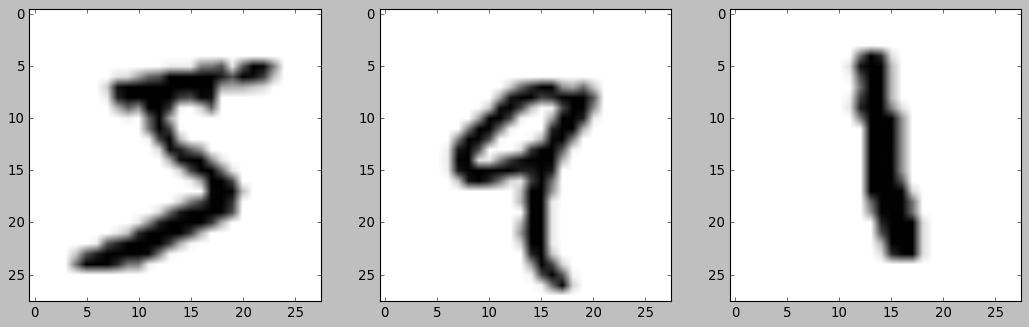

In [11]:
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,3,1)
plt.imshow(x_train[0].squeeze(), cmap='gray_r')
fig.add_subplot(1,3,2)
plt.imshow(x_train[4].squeeze(), cmap='gray_r')
fig.add_subplot(1,3,3)
plt.imshow(x_train[6].squeeze(), cmap='gray_r')

## Neural Network Model

### Creation of the model

In [12]:
num_classes = 10
def createModel():
    model = Sequential()
    model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
     
    return model

In [13]:
K.clear_session()
model = createModel()

In [14]:
AdamOpt = Adam(lr=0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=AdamOpt,
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

### Training of the network

In [16]:
batch_size = 256
epochs = 3 # Try with 10 but keep in mind it will take 10 minutes or longer (depending on your hardware)

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, 
                    verbose=1, 
                    validation_data=(x_test, y_test))

Epoch 1/3
235/235 [==============================] - 30s 126ms/step - loss: 0.2935 - accuracy: 0.9087 - val_loss: 0.0554 - val_accuracy: 0.9823
Epoch 2/3
235/235 [==============================] - 30s 128ms/step - loss: 0.0974 - accuracy: 0.9707 - val_loss: 0.0406 - val_accuracy: 0.9866
Epoch 3/3
235/235 [==============================] - 30s 127ms/step - loss: 0.0736 - accuracy: 0.9776 - val_loss: 0.0341 - val_accuracy: 0.9880


## Plots

Text(0, 0.5, 'Loss')

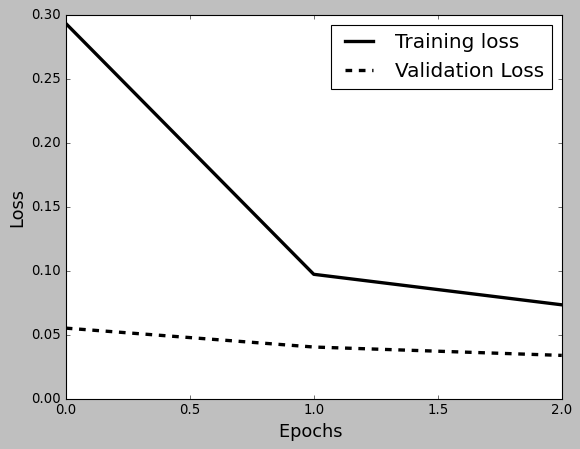

In [17]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'black',linewidth=3.0)
plt.plot(history.history['val_loss'],'black',ls = '--', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
#plt.title('Loss Curves',fontsize=16)

#plt.savefig('loss.png', bbox_inches='tight', dpi = 300)
#files.download('loss.png')

Text(0, 0.5, 'Accuracy')

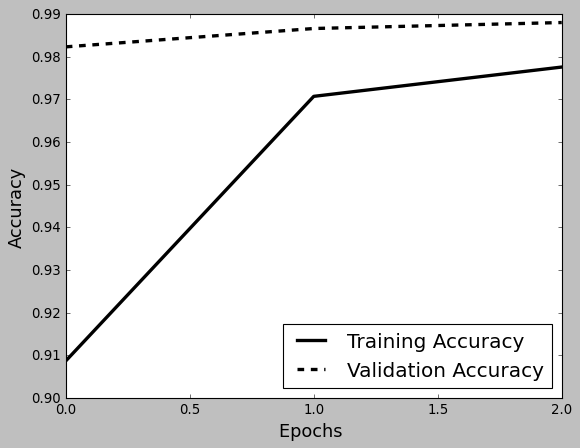

In [18]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'black',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'black',ls = '--',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18, 
           loc = 'lower right')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
#plt.title('Accuracy Curves',fontsize=16)

#plt.savefig('accuracy.png', bbox_inches='tight', dpi = 300)
#files.download('accuracy.png')